In [2]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()


Saving survey.csv to survey.csv


In [6]:
df = pd.read_csv('survey.csv')

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
df = df.drop(columns=["Timestamp", "comments", "state"])


In [9]:
df = df.dropna()

In [10]:
df["treatment"] = df["treatment"].map({"Yes": 1, "No": 0})

In [13]:
X = pd.get_dummies(df[["Age", "remote_work", "family_history", "work_interfere"]])
y = df["treatment"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7687074829931972
              precision    recall  f1-score   support

           0       0.74      0.57      0.65       108
           1       0.78      0.88      0.83       186

    accuracy                           0.77       294
   macro avg       0.76      0.73      0.74       294
weighted avg       0.77      0.77      0.76       294



In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [23]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

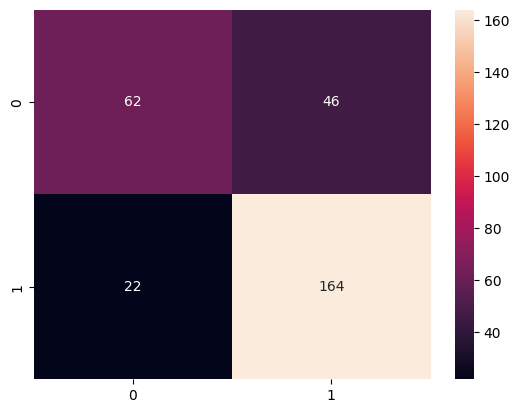

In [25]:
sns.heatmap(cm, annot=True, fmt="d")

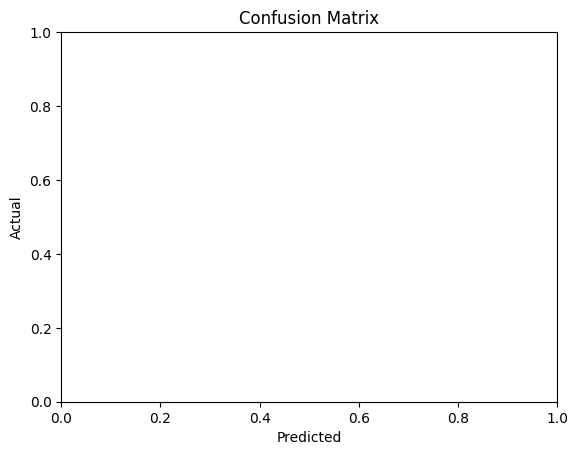

In [26]:
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
import joblib

# Save trained model
joblib.dump(model, 'mental_health_model.pkl')


['mental_health_model.pkl']

In [28]:
from google.colab import files
files.download('mental_health_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>